bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)
# other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Import lib

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

# EDA

### Read and understanding the data

In [197]:
train_df = pd.read_csv("train.csv",sep=';',header=0)
test_df = pd.read_csv("test.csv",sep=';',header=0)
# Using sep=; to seplit the column by this operatior, header = 0

In [198]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [199]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [200]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualization

 Distribution of UNKNOWN *values*

In [201]:
unknown_columns = ["job", "education", "contact", "poutcome"]
unknown_proportions = train_df[unknown_columns].apply(lambda col: (col == "unknown").mean())
print(unknown_proportions)

# job          0.006370
# education    0.041074
# contact      0.287983 # High
# poutcome     0.817478 # High

job          0.006370
education    0.041074
contact      0.287983
poutcome     0.817478
dtype: float64


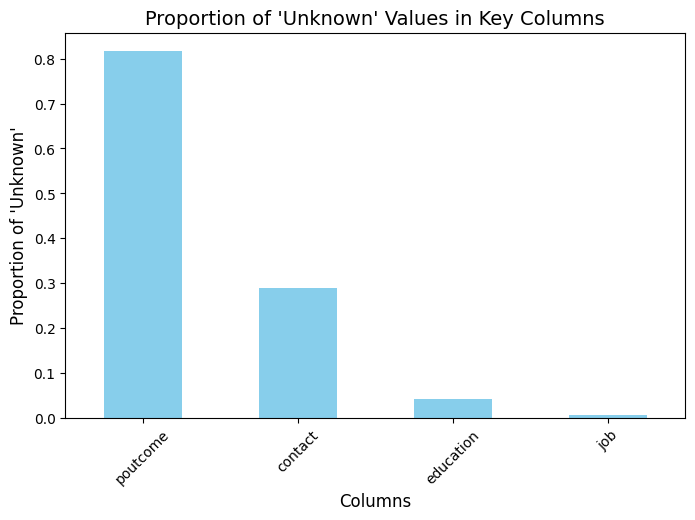

In [202]:
unknown_proportions.sort_values(ascending=False).plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Proportion of 'Unknown' Values in Key Columns", fontsize=14)
plt.ylabel("Proportion of 'Unknown'", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Relationship between unknown values with our targer col

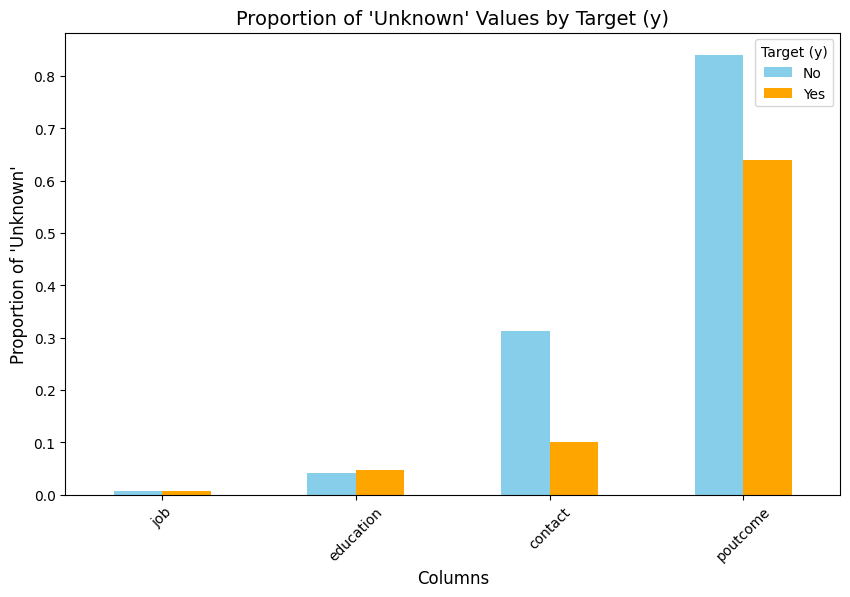

In [203]:
# List of columns with "unknown" values
unknown_columns = ["job", "education", "contact", "poutcome"]

# Calculate proportion of "unknown" values grouped by target
unknown_vs_target = {
    col: train_df.groupby('y')[col].apply(lambda x: (x == "unknown").mean())
    for col in unknown_columns
}

# Convert to DataFrame for visualization
unknown_vs_target_df = pd.DataFrame(unknown_vs_target).T
unknown_vs_target_df.columns = ["No", "Yes"]

# Plot the results
unknown_vs_target_df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Proportion of 'Unknown' Values by Target (y)", fontsize=14)
plt.ylabel("Proportion of 'Unknown'", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Target (y)", fontsize=10)
plt.show()
# It seems there is no relation between unknown values and the outcome - We will handle it as it is

In [204]:
categorical_cols = train_df.select_dtypes(include=['object']).columns  # Select categorical columns
for column in categorical_cols:
    print("Column name : ", column, "values : ", train_df[column].unique())

Column name :  job values :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column name :  marital values :  ['married' 'single' 'divorced']
Column name :  education values :  ['tertiary' 'secondary' 'unknown' 'primary']
Column name :  default values :  ['no' 'yes']
Column name :  housing values :  ['yes' 'no']
Column name :  loan values :  ['no' 'yes']
Column name :  contact values :  ['unknown' 'cellular' 'telephone']
Column name :  month values :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column name :  poutcome values :  ['unknown' 'failure' 'other' 'success']
Column name :  y values :  ['no' 'yes']


In [205]:
numeric_df = train_df.select_dtypes(include=np.number)
corr = numeric_df.corr()

<Axes: >

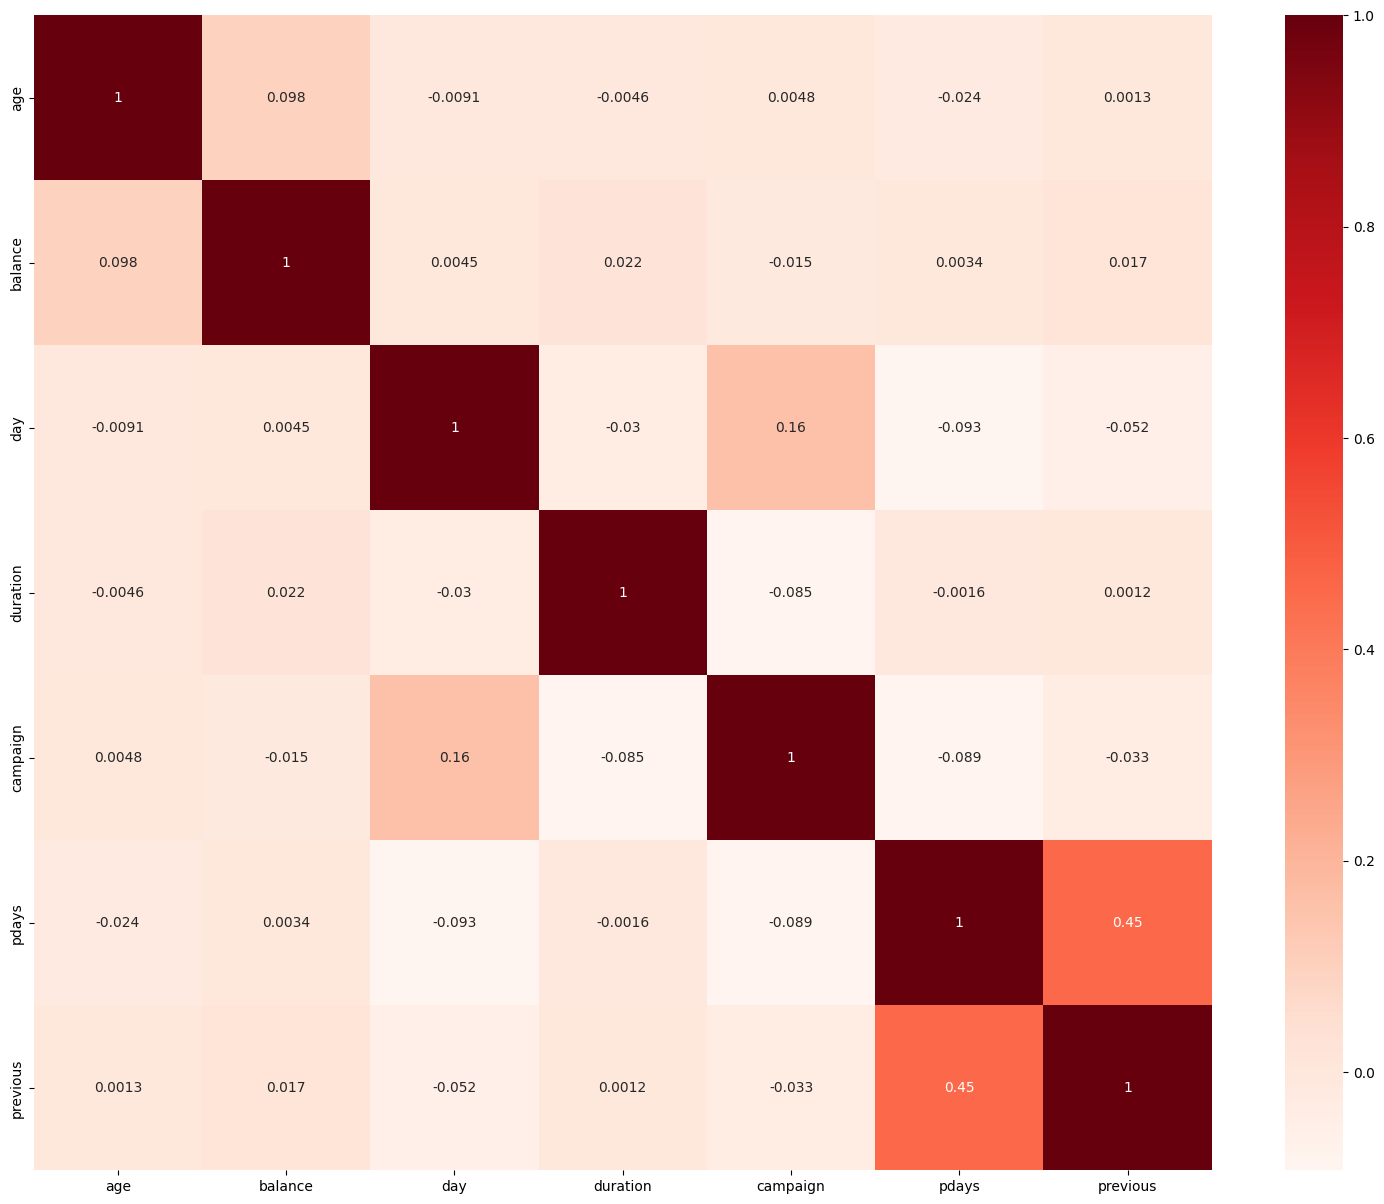

In [206]:
plt.figure(figsize=(19,15))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

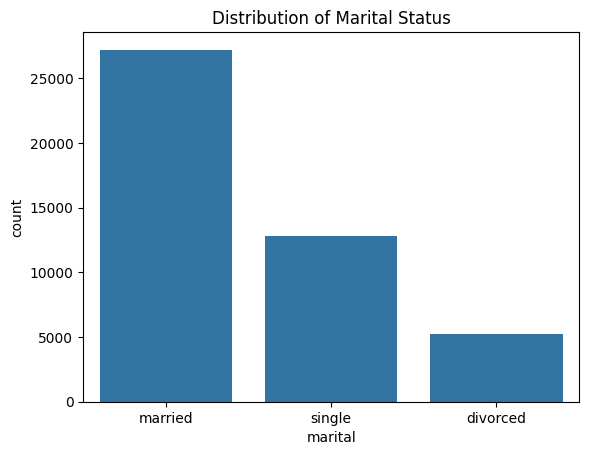

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 'marital' column
sns.countplot(data=train_df, x='marital')
plt.title("Distribution of Marital Status")
plt.show()

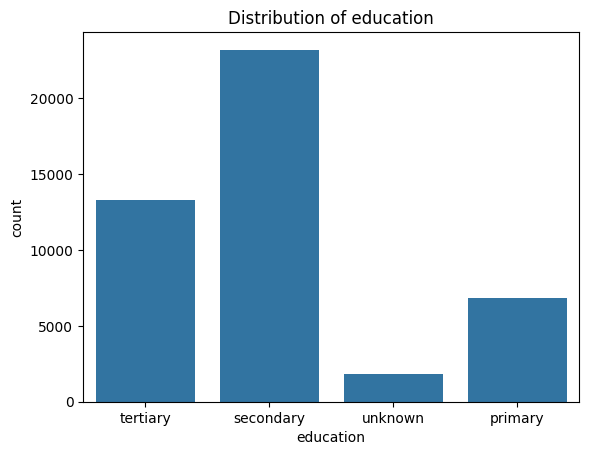

In [208]:
sns.countplot(data=train_df, x='education')
plt.title("Distribution of education")
plt.show()

#Encoding

In [209]:
train_df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


### One-Hot encoding

In [210]:
# One-Hot encoding - because we have a lot of values for these columns and this encoder is best fit
train_df = pd.get_dummies(train_df, columns=['job', 'contact', 'poutcome'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['job', 'contact', 'poutcome'], drop_first=True)
train_df.head(1)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,tertiary,no,2143,yes,no,5,may,261,...,False,False,False,False,False,False,True,False,False,True


In [211]:
boolean_columns = train_df.select_dtypes(include=['bool']).columns
train_df[boolean_columns] = train_df[boolean_columns].astype(int)
test_df[boolean_columns] = test_df[boolean_columns].astype(int)

In [212]:
train_df.head(1)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,tertiary,no,2143,yes,no,5,may,261,...,0,0,0,0,0,0,1,0,0,1


### Ordinal encoding

In [213]:
# Mapping education to numerical values (ordinal encoding)
education_mapping = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3,
    'unknown': 0
}

train_df['education'] = train_df['education'].map(education_mapping)
test_df['education'] = test_df['education'].map(education_mapping)
# Check the result
train_df.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,3,no,2143,yes,no,5,may,261,...,0,0,0,0,0,0,1,0,0,1
1,44,single,2,no,29,yes,no,5,may,151,...,0,0,1,0,0,0,1,0,0,1
2,33,married,2,no,2,yes,yes,5,may,76,...,0,0,0,0,0,0,1,0,0,1
3,47,married,0,no,1506,yes,no,5,may,92,...,0,0,0,0,0,0,1,0,0,1
4,33,single,0,no,1,no,no,5,may,198,...,0,0,0,0,1,0,1,0,0,1


### Months to int

In [214]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}

train_df['month'] = train_df['month'].map(month_mapping)
test_df['month'] = test_df['month'].map(month_mapping)
train_df.head(1)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,3,no,2143,yes,no,5,5,261,...,0,0,0,0,0,0,1,0,0,1


### Binary encoding

In [215]:
binary_cols = ['default', 'housing', 'loan']
train_df[binary_cols] = train_df[binary_cols].apply(lambda x: x.map({'yes':1,'no':0}))
test_df[binary_cols] = test_df[binary_cols].apply(lambda x: x.map({'yes':1,'no':0}))
train_df.head(1)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,3,0,2143,1,0,5,5,261,...,0,0,0,0,0,0,1,0,0,1


### Label encoding

In [216]:
# 1. Encoding the 'marital' column with Label Encoding
train_df['marital'] = train_df['marital'].map({'married': 0, 'divorced': 1, 'single': 2})
test_df['marital'] = test_df['marital'].map({'married': 0, 'divorced': 1, 'single': 2})
# Check the results
train_df.head(1)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,3,0,2143,1,0,5,5,261,...,0,0,0,0,0,0,1,0,0,1


# Feature Scaling

In [217]:
from sklearn.preprocessing import StandardScaler

# Ignoring Day column for my experiments
scaler = StandardScaler()
train_df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(train_df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
test_df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.transform(test_df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
#Transform the test df to the same train df scaler
train_df.head()

# numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# for column in numerical_columns:
#     df[column] = scaler.fit_transform(df[[column]])


,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,3,0,0.256419,1,0,5,5,0.011016,...,0,0,0,0,0,0,1,0,0,1
1,0.288529,2,2,0,-0.437895,1,0,5,5,-0.416127,...,0,0,1,0,0,0,1,0,0,1
2,-0.747384,0,2,0,-0.446762,1,1,5,5,-0.707361,...,0,0,0,0,0,0,1,0,0,1
3,0.571051,0,0,0,0.047205,1,0,5,5,-0.645231,...,0,0,0,0,0,0,1,0,0,1
4,-0.747384,2,0,0,-0.447091,0,0,5,5,-0.233620,...,0,0,0,0,1,0,1,0,0,1


In [224]:
train_df.sample(10)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
31506,-0.841558,2,2,0,-0.292726,0,1,2,4,-0.058880,...,0,0,0,0,0,0,0,0,0,1
5020,-0.935732,2,2,0,-0.289442,1,0,21,5,-0.559802,...,1,0,0,0,0,0,1,0,0,1
15457,0.571051,0,1,0,-0.466469,1,0,18,7,-0.645231,...,0,0,0,0,0,0,0,0,0,1
22728,-0.182341,2,3,0,-0.460885,0,1,25,8,-0.847153,...,0,0,1,0,0,0,0,0,0,1
31283,-0.653211,2,3,0,-0.258569,0,0,9,3,-0.552036,...,0,0,0,0,0,0,0,0,0,1
35452,1.136095,1,2,0,-0.438880,1,0,7,5,-0.785023,...,0,0,0,0,0,0,0,0,0,0
26384,0.006007,0,2,0,-0.223097,0,1,20,11,-0.703478,...,0,0,0,0,0,0,0,0,0,1
32968,-0.935732,0,1,0,-0.429355,1,1,17,4,0.317782,...,0,0,0,0,0,0,0,0,0,1
30765,0.476877,1,2,1,-0.440194,0,0,6,2,-0.971413,...,0,0,0,1,0,0,0,0,0,1
28945,-0.747384,2,2,0,-0.421473,0,0,2,2,1.614744,...,0,0,0,0,0,0,0,0,0,1


In [223]:
test_df.sample(10)

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
972,-1.500776,2,2,0,0.609160,1,0,28,5,-0.909283,...,1,0,0,0,0,0,1,0,0,1
1901,-1.029906,2,3,0,-0.436253,1,0,6,5,0.119743,...,0,1,0,0,0,0,1,0,0,1
2449,-0.464863,0,3,0,-0.143616,0,0,14,12,0.244003,...,0,0,0,0,0,0,0,0,1,0
3638,-0.841558,2,2,0,-0.456616,0,1,4,7,0.550770,...,0,0,1,0,0,0,1,0,0,1
2053,-1.594950,2,2,0,-0.462527,1,0,19,5,-0.913166,...,0,0,1,0,0,0,1,0,0,1
1628,-0.276515,0,2,0,-0.177773,1,1,17,11,-0.132659,...,0,0,1,0,0,0,0,0,0,0
2049,1.701139,0,1,0,0.931355,0,0,14,1,0.197406,...,0,0,1,0,0,0,0,0,1,0
3452,-0.935732,0,2,0,-0.447419,1,0,29,7,-0.684062,...,0,0,0,0,0,0,0,0,0,1
2510,1.136095,1,2,1,-0.513107,0,1,6,6,-0.377296,...,0,0,0,0,0,0,1,0,0,1
1838,-0.559037,0,2,0,-0.171861,1,0,23,5,-0.808322,...,0,0,0,0,0,0,1,0,0,1


# Building the model

### Splitting the data into training and testing

In [227]:
x_train = train_df.drop(columns=['y'])
y_train = train_df['y']
x_test = test_df.drop(columns=['y'])
y_test = test_df['y']
# As i know - no need to split for evaluation because it's 2 files ( unseen data ) - will read more about it

### Using Randomforest model

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [263]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [264]:
y_pred = model.predict(x_test)

In [265]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Evaluation

Accuracy: 1.0


In [266]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
#Evaluation

Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



### Cross-validation

In [270]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x_train, y_train, cv=4, scoring='accuracy')  # Using 2-fold cross-validation

In [271]:
cv_scores # Evaluation in cross-validation ([First fold of data, second one])
#significant drop in performance

array([0.88233212, 0.73228346, 0.66407149, 0.33454256])

In [269]:
mean_score = np.mean(cv_scores)
std_dev_score = np.std(cv_scores)

# Output the results
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", mean_score)
print("Standard deviation: ", std_dev_score)

Cross-validation scores:  [0.86698222 0.26799381]
Mean accuracy:  0.5674880118952198
Standard deviation:  0.29949420521528175


NEED MORE EXPERIMENTS